# Hands-on experiment 3
## Sparsest Cut Problem via Semidefinite Programming

The Uniform Sparsest Cut problem (USC) aims to find a bipartition
$(S, \bar{S})$ of the nodes of a graph $G = (V, E)$,
$\vert V \vert = p$, which minimizes the quantity $$\frac{E(S, \bar{S})}{\lvert S \rvert \; \lvert \bar{S} \rvert},$$
where $E(S, \bar{S})$ is the number of edges connecting $S$ and
$\bar{S}$, and $\lvert S \rvert$ is the number of nodes in $S$. This
problem is of broad interest, with applications in areas such as VLSI
layout design, topological design of communication networks and image
segmentation. Relevant to machine learning, it appears as a subproblem
in hierarchical clustering algorithms
[@Dasgupta2016; @Chatziafratis2018].

Computing such a bipartition is NP-hard and intense research has gone
into designing efficient approximation algorithms for this problem. In
the seminal work of [@Arora2009] an $\mathcal{O}(\sqrt{\log p})$ approximation
algorithm is proposed for solving USC, which relies on finding a
*well-spread* $\ell_2^2$ geometric representation of $G$ where each node
$i\in V$ is mapped to a vector ${\textbf v}_i$ in $\mathbb{R}^p$. In this
experimental section we focus on solving the SDP that computes this
geometric embedding.

The canonical formulation of the SDP is 
\begin{align}
{\boldsymbol X}^\star \in \arg \min_{ {\boldsymbol X} } \bigg\{ \langle \boldsymbol{C}, {\boldsymbol X} \rangle : &~p \; \mathrm{Tr}({\boldsymbol X}) -  \mathrm{Tr}(\mathbf{1}_{p\times p}{\boldsymbol X}) = \frac{p^2}{2}, ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\longleftarrow ~~\equiv A({\boldsymbol X}) = \frac{p^2}{2}  \\[3mm] 
& \; {\boldsymbol X}_{i,j} + {\boldsymbol X}_{j,k} - {\boldsymbol X}_{i, k} - {\boldsymbol X}_{j,j} \leq 0, \; \forall\ i \neq j \neq k \neq i\in V, ~~~\longleftarrow ~~\equiv B_{i,j,k}({\boldsymbol X}) \in \mathcal{K} = (-\infty, 0] \tag{Problem 2} \\[3mm]
&~\underbrace{\mathrm{Tr}({\boldsymbol X}) \leq p, ~{\boldsymbol X} \in \mathbb{R}^{p\times p} ,~{\boldsymbol X}\succeq 0}_{\mathcal{X}} \bigg\},~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\longleftarrow ~~ {\boldsymbol X}  \in \mathcal{X} \text{ (the SDP cone of bounded trace)} 
\end{align}
 where $\boldsymbol{C}$ represents the Laplacian of graph
$G$ and ${\boldsymbol X}_{i,j} = \langle {\textbf v}_{i}, {\textbf v}_j\rangle$ gives the geometric
embedding of the nodes.

We can rewrite the optimization
problem <span class="reference" data-target="Problem 2">2</span> as $$
    \min_{{\boldsymbol X} \in \mathcal{X}} f({\boldsymbol X}) + g(A({\boldsymbol X})) ~~~~~~~~\text{ subject to } ~~~~B_{i,j,k}({\boldsymbol X}) \in \mathcal{K}, \;\forall\ i \neq j \neq k \neq i\in V, \tag{Problem 3}$$
where $f({\boldsymbol X}) = \langle \boldsymbol{C}, {\boldsymbol X} \rangle$ and
$g(\cdot) = \delta_{\left\{\frac{p^2}{2}\right\}}(\cdot)$ is the
indicator function of singleton $\left\{\frac{p^2}{2}\right\}$.

## 3.1 Theory 

#### Question 3.1.1  (5 pts) Count the constraints
    
How many constraints does
<span class="reference" data-target="Problem 2">Problem 2</span> have (as a function of $p$)? How does this
number compare to the one of
<span class="reference" data-target="Problem 1">Problem 1</span> from Part 2?

**N.B.1**: In Part 2 the constraints are expressed in matrix form,
while here they are listed individually. Make sure to take this into
account (e.g., the constraint ${\boldsymbol X} \geq 0$ in Part 2 is applied *for
each* entry).

**N.B.2**: You can respond to this question by either computing the
exact number of constraints, or by identifying the correct order of
magnitude (big-O notation).


<font color="blue">

$X \in \mathcal{X}$ has O(p) constraints
$B_{i,j,k}$ is a p dependent constraint and it needs to be applied to the whole matrix which has p(p-1)(p-2) possible combinations thus it has $O(p^3)$ constraints
$A(X)$ has O(1) constraints
Therefore, problem 2 has $O(p^3)$ constraints.
    
In part 2, 
$X \in \mathcal{X}$ has O(p) constraints.
$X \geq 0$ has $O(p^2)$ constraints.
Row and column sums have $O(p^2)$ constraints.
Therefore, part 2 problem has $O(p^2)$ constraints.

To compare, part 3 has more constraints than part 2 by an order of O(p).

#### Question 3.2.1 (5 pts) Write down the quadratic penalty form

Express the constraints in <span class="reference" data-target="Problem 3">Problem 3</span> in quadratic penalty form and write down the corresponding penalized objective function.

<font color="blue">

We can rewrite the optimization problem 
$$\min_{{\boldsymbol X} \in \mathcal{X}} ({f(x) : A(\boldsymbol x}) = p^2/2 + g(A({\boldsymbol X})) ~~~~~~~~\text{ subject to } ~~~~B_{i,j,k}({\boldsymbol X}) \in \mathcal{K}, \;\forall\ i \neq j \neq k \neq i\in V, \tag{Problem 3}$$
where $f({\boldsymbol X}) = \langle \boldsymbol{C}, {\boldsymbol X} \rangle$ and
$g(\cdot) = \delta_{\left\{\frac{p^2}{2}\right\}}(\cdot)$ is the
indicator function of singleton $\left\{\frac{p^2}{2}\right\}$.
    
    
For $\frac{p^2}{2}$, QP form can be written as $\|A(X) - \frac{p^2}{2}\|^2$
    
For $B_{i,j,k}({\boldsymbol X}) \in \mathcal{K}$, QP form can be written as $\|B_{i,j,k}({\boldsymbol X}) - proj_\kappa B_{i,j,k}({\boldsymbol X}) \|^2 $
    
QP form of the problem therefore is,
    
$$ \langle \boldsymbol{C}, {\boldsymbol X} \rangle + \frac{1}{2\beta} \|A(X) - \frac{p^2}{2}\|^2 +  \frac{1}{2\beta} \sum_{i \neq j \neq k \neq i \in V} \|B_{i,j,k}({\boldsymbol X}) - proj_\kappa B_{i,j,k}({\boldsymbol X}) \|^2  $$ where $\beta$ is defined same as in part 2
    
    


<font color="blue">


## 3.2 Implementation

We will now observe the behavior of HCGM on three graphs
    from the Network Repository dataset [@Rossi2015]:

-   **G1:** `mammalia-primate-association-13` with $25$ nodes,

-   **G2:** `55n-insecta-ant-colony1-day37` with $55$ nodes and

-   **G3:** `insecta-ant-colony4-day10` with $102$ nodes.

#### Question 3.2.1 (3 points) Estimate the number of constraints

Based on your calculation in point (1), give an estimate of the
number of constraints for each dataset above.


<font color="blue">

Number of constraints 
    
For G1, $(25^3) = 15626$
    
For G2, $O(55^3) = 166375$
    
For dataset 3, $O(102^3) = 1061208$

#### Question 3.2.2 (2 points) Complete the implementation

We provide most of the code for solving this problem below. Use the implementation of `lmo` and `HCGM_update` you completed in Part 2. Run the
algorithm for each dataset (you can cook your dinner in the
meantime). Include the generated plots in your submitted notebook. 

In [1]:
from lib.part3.helpers import *
import scipy

In [2]:
def lmo(grad, kappa):
    # Fill all
    q, u = scipy.sparse.linalg.eigsh(grad, k=1, tol = 1e-16, which = 'SA')
    #if q.all() >= u.all() :
    #    X_bar = 0
    if q >= 0: 
        u = np.zeros(u.shape)
    else:
        u = np.sqrt(kappa)*u
    X_bar = np.outer(u,u)
    return X_bar

In [3]:
def HCGM_initialize(f, Xzero, beta0):
    k = 0
    return HCGM_state(x_k = Xzero, k = k, beta0 = beta0)

In [4]:
def HCGM_update(p : ConstrainedProblem, state : HCGM_state):
    # Copy from Part 2
    f, penalties = p
    x_k, k, beta0 = state
    
    gamma_k = 2/(k+1)
    
    beta_k = beta0 / np.sqrt(k + 1)
    
    v_k = beta_k * f.grad(x_k) + penalties[0].grad(x_k) + penalties[1].grad(x_k) + penalties[2].grad(x_k)

    X_bar = lmo(v_k, kappa = 10)
    
    X_next = (1 - gamma_k) * x_k + gamma_k * X_bar
    
    return HCGM_state(x_k = X_next, k = k+1, beta0 = beta0)

In [5]:
HCGM = OptAlgorithm("HCGM", HCGM_initialize, HCGM_update)

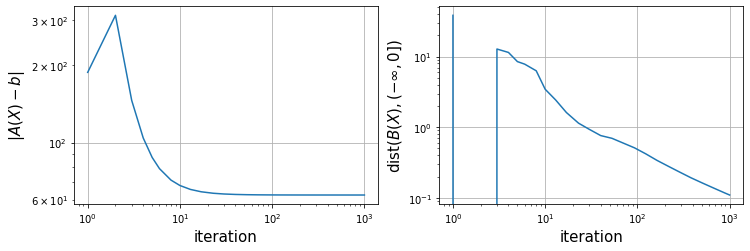

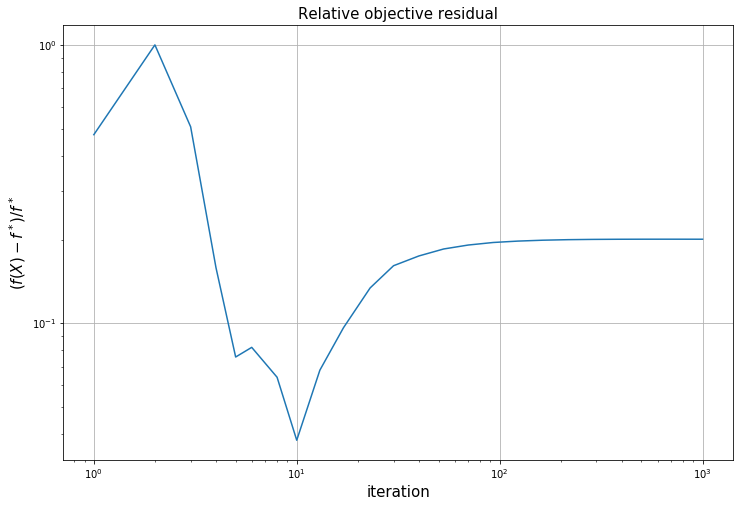

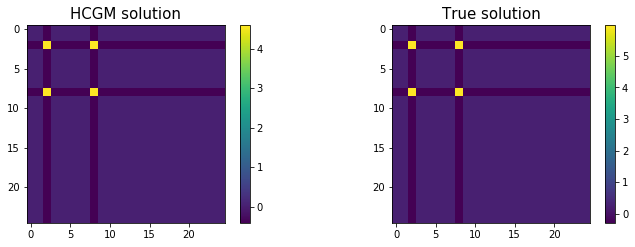


HCGM finished. Running time: 95.00951600074768 seconds.


In [6]:
problem = construct_problem('lib/part3/data/25mammalia-primate-association-13.mat')
run_HCGM(problem, HCGM, maxit=int(1e3), beta0=5)

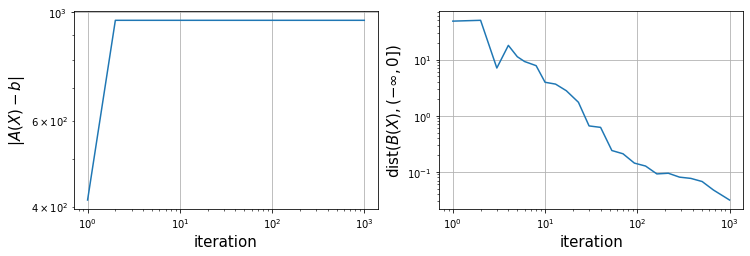

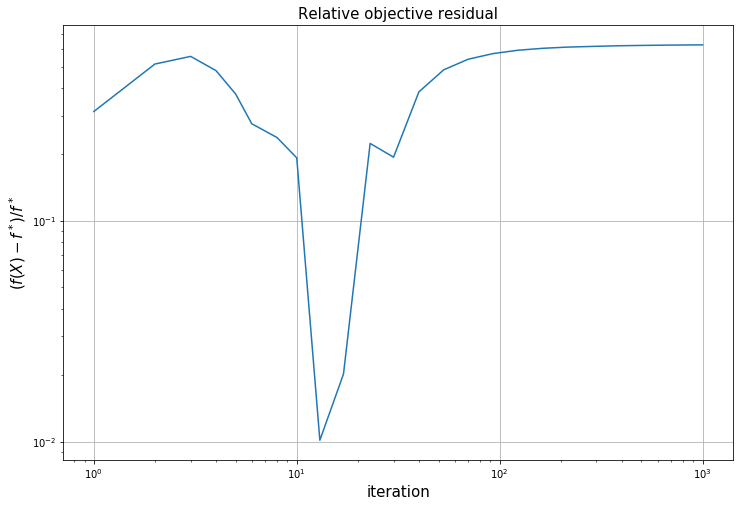

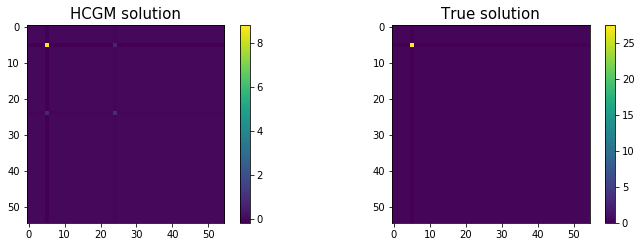


HCGM finished. Running time: 1254.5866928100586 seconds.


In [7]:
problem = construct_problem('lib/part3/data/55n-insecta-ant-colony1-day37.mat', beta0=5)
run_HCGM(problem, HCGM, maxit=int(1e3))

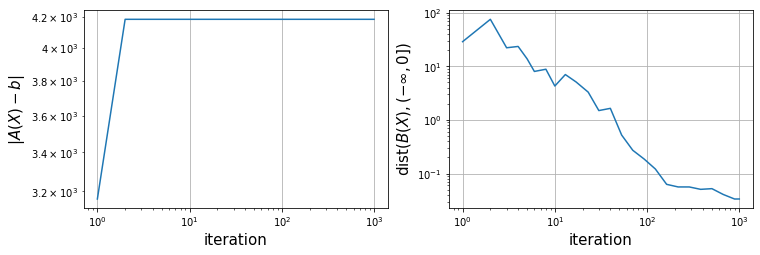

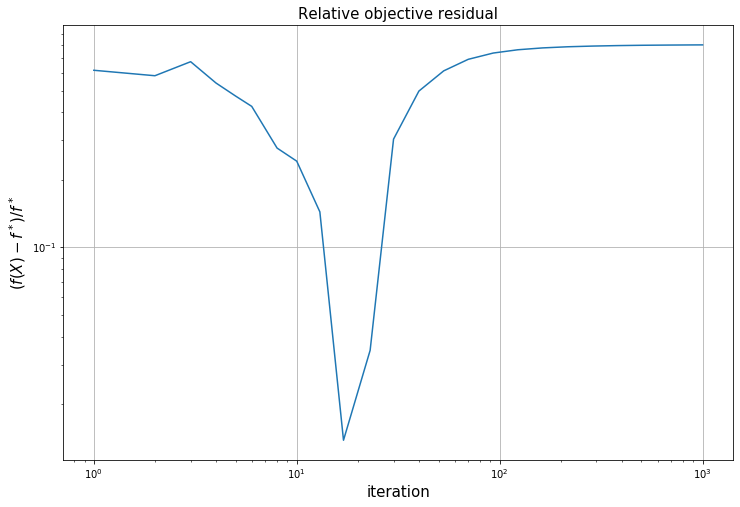

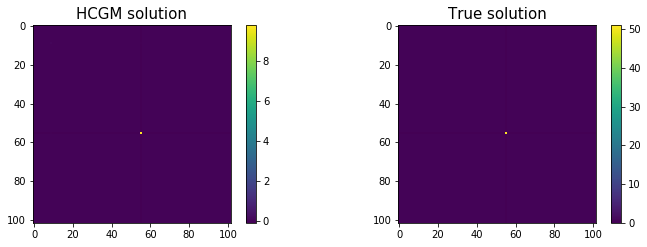


HCGM finished. Running time: 5604.039990901947 seconds.


In [8]:
problem = construct_problem('lib/part3/data/102n-insecta-ant-colony4-day10.mat', beta0=5)
run_HCGM(problem, HCGM, maxit=int(1e3))

#### Question 3.2.3 (2 points) Running time

What do you notice about the running times of the algorithm for the three
problem instances? 


<font color="blue">


It is very slow for graphs with higher number of nodes. It took around 50 minutes for G2 and around 90 minutes for G3. The run time doesn't scale well for the problem.

#### Question 3.2.4 (3 points) Bottlenecks

What are the potential bottlenecks to applying
this method to large graphs?

<font color="blue">
    
When applying this to large graphs, the number of constraints to be computed is a bottleneck. Even for G3 with 102 nodes, it took very long. It will not scale well to large graphs. 

One way to address the issues you identified above, especially if
low accuracy suffices, is to resort to stochastic algorithms (the
reasoning here is similar to the one which stands behind GD vs.
SGD). Such an example are the methods proposed
in [@Vladarean2020], where the framework of HCGM is used
in conjunction with stochastic gradients and variance reduction for
alleviating some of the shortcomings of the full-batch method you
implemented above. A brief presentation of these methods is provided
in the supplementary section of Lecture 13.

# References

<div id="refs" class="references csl-bib-body hanging-indent"
role="doc-bibliography">
<div id="ref-arv" class="csl-entry" role="doc-biblioentry">
[@Arora2009] Arora, Sanjeev, Satish Rao, and Umesh Vazirani. 2009. <span>“Expander
Flows, Geometric Embeddings and Graph Partitioning.”</span> <em>Journal
of the ACM (JACM)</em> 56 (2): 5.
</div>
<div id="ref-chatziafratis2018hierarchical" class="csl-entry"
role="doc-biblioentry">
[@Chatziafratis2018] Chatziafratis, Vaggos, Rad Niazadeh, and Moses Charikar. 2018.
<span>“Hierarchical Clustering with Structural Constraints.”</span>
<em>arXiv Preprint arXiv:1805.09476</em>.
</div>
<div id="ref-dasgupta2016cost" class="csl-entry" role="doc-biblioentry">
[@Dasgupta2016] Dasgupta, Sanjoy. 2016. <span>“A Cost Function for Similarity-Based
Hierarchical Clustering.”</span> In <em>Proceedings of the Forty-Eighth
Annual ACM Symposium on Theory of Computing</em>, 118–27.
</div>
<div id="ref-nr" class="csl-entry" role="doc-biblioentry">
[@Rossi2015] Rossi, Ryan A., and Nesreen K. Ahmed. 2015. <span>“The Network Data
Repository with Interactive Graph Analytics and Visualization.”</span>
In <em>AAAI</em>. <a
href="http://networkrepository.com">http://networkrepository.com</a>.
</div>
<div id="ref-vladarean2020conditional" class="csl-entry"
role="doc-biblioentry">
[@Vladarean2020] Vladarean, Maria-Luiza, Ahmet Alacaoglu, Ya-Ping Hsieh, and Volkan
Cevher. 2020. <span>“Conditional Gradient Methods for Stochastically
Constrained Convex Minimization.”</span> In <em>International Conference
on Machine Learning</em>, 9775–85. PMLR.
</div>
</div>